## Jesus Javier Can Noh

# KNN pseduo code

###  1. Pick a value for K
### 2. Calculate the distance from new point to all other points
### 3. Pick the K closest points
### 4. Assign the new point to the class where the majority of the K points belong


# KNN code and test

In [1]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#function that calculates euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
#

#function that calculates k nearest neighbors with euclidean distance
def k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x) for x in X_train] #calculate distances between x_test and all points in X_train
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]



In [2]:
#load iris dataset

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Acurracy: 1.0
Loss: 0.0


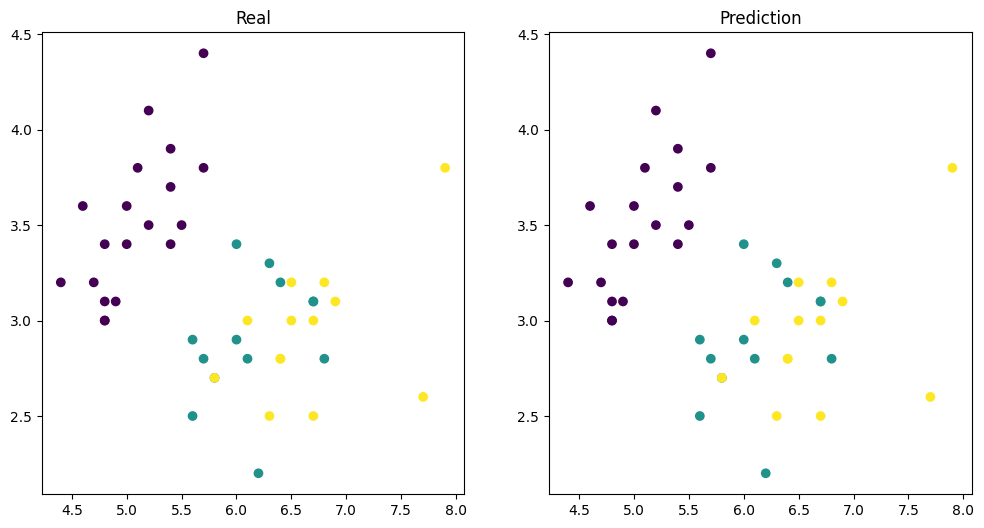

In [3]:
#test

k = 3
y_pred = [k_nearest_neighbors(X_train, y_train, x, k) for x in X_test]



#acurracy
correct_predictions = np.sum(y_pred == y_test)
accuracy = correct_predictions / len(y_test)
print("Acurracy:", accuracy)

#loss function
loss = np.mean(y_pred != y_test)
print("Loss:", loss)


#visualizations
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Real")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.subplot(1, 2, 2)
plt.title("Prediction")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()





# it is just to know the boundary of the data prediction


<Figure size 1200x600 with 0 Axes>

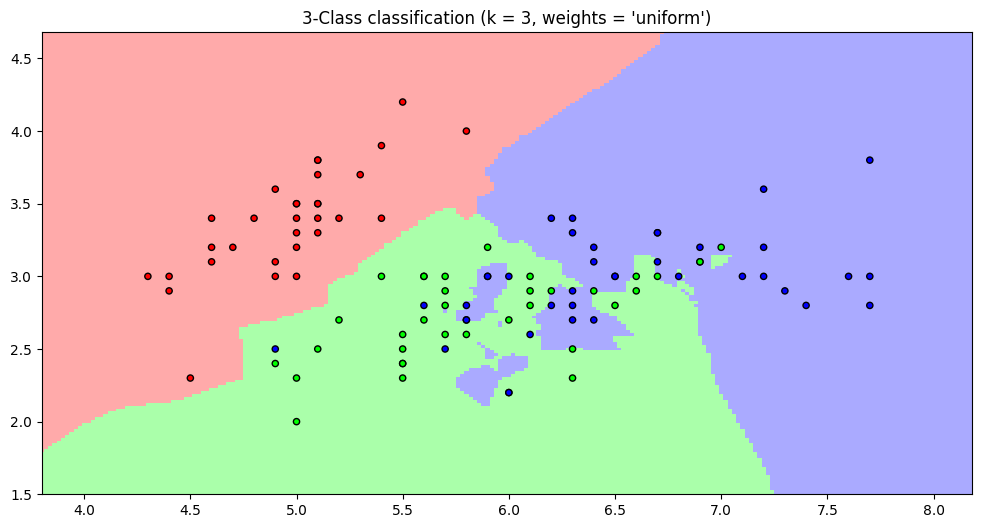

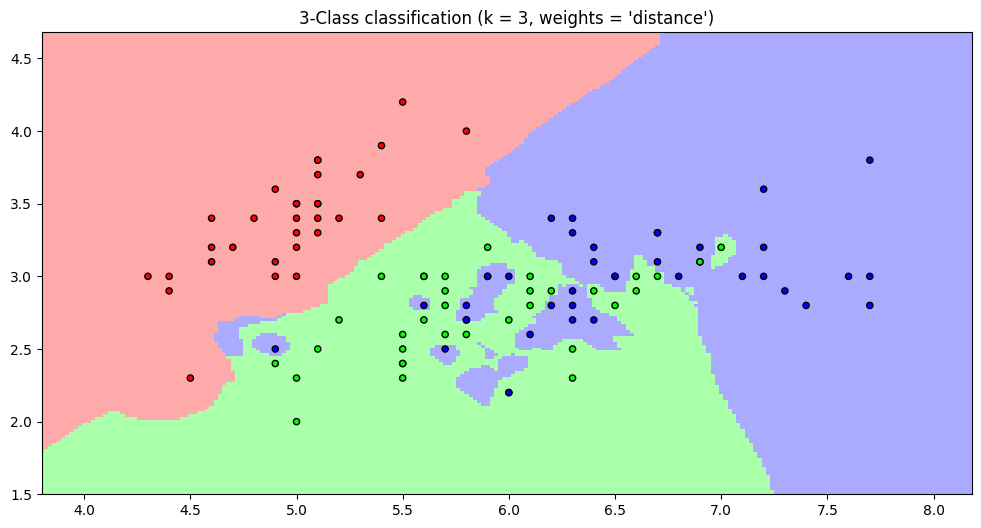

In [4]:
#color the decision boundaries
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12, 6))

# Plot also the training points

h = .02  # step size in the mesh
X = X_train[:, :2]

# Create color maps

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k, weights=weights)
    clf.fit(X, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5

    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 6))

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points

    plt.scatter(X[:, 0], X[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())

    plt.ylim(yy.min(), yy.max())

    plt.title("3-Class classification (k = %i, weights = '%s')" % (k, weights))

plt.show()

